# Logistic regression

In this notebook, we will attempt to perform a binary classification on the data, the two classes being not readmitted, or readmitted (in > or < 30 days). We will use the unprocessed (cleaned) dataset for now.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [3]:
# Load the cleaned data
df = pd.read_csv('./data/dataset_clean.csv')

# Create binary target
df['readmit_binary'] = df['readmitted'].apply(lambda x: 1 if ((x == '<30')|(x=='<30')) else 0)

In [4]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit_binary
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97104,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,Down,No,No,No,No,No,Ch,Yes,>30,0
97105,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,Steady,No,No,No,No,No,No,Yes,NO,0
97106,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,Down,No,No,No,No,No,Ch,Yes,NO,0
97107,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,Up,No,No,No,No,No,Ch,Yes,NO,0


In [5]:
  # Define features and target
X = df.drop(columns=['readmitted', 'readmit_binary'])
y = df['readmit_binary']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, f1_score, precision_recall_curve,precision_score, recall_score
from sklearn.metrics import mean_squared_error, r2_score




In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [8]:
# --- Step 1: Select Features and Target ---
#df['readmit_30'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
#X = df.drop(columns=['readmitted', 'readmit_30'])  # Drop target and redundant original column
#y = df['readmit_30']

# --- Step 2: Train-Test Split ---
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Step 3: Preprocessing ---
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# --- Step 4: Define Base Model Pipeline ---
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='lbfgs'))
])

# --- Step 5: Fit Model ---
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['encounter_id',
                                                   'patient_nbr',
                                                   'admission_type_id',
                                                   'discharge_disposition_id',
                                                   'admission_source_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses']),
                                                 ('cat',
                                                  O...
                                                   'chlorpropamide',
                                                   'glimepiride',
                                                   'acetohexamide', 'glipizide',
                                                   'glyburide', 'tolbutamide',
                                                   'pioglitazone',
                                                   'rosiglitazone', 'acarbose',
                                                   'miglitol', 'troglitazone',
                                                   'tolazamide', 'examide',
                                                   'citoglipton', 'insulin',
                                                   'glyburide-metformin',
                                                   'glipizide-metformin',
                                                   'glimepiride-pioglitazone',
                                                   'metformin-rosiglitazone', ...])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [9]:
probs = model.predict_proba(X_test)
y_pred = (probs[:, 1]>=0.12)

In [10]:
#PROCESSED METRICS
# --- Step 6: Evaluate Model ---
#y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
false_pos_rate, true_pos_rate, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(false_pos_rate, true_pos_rate)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Mean squared error = ",mse)
print("Accuracy = ",acc)
print("ROC AUC score = ",roc_auc)

Confusion Matrix:
[[11879  5318]
 [ 1055  1170]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79     17197
           1       0.18      0.53      0.27      2225

    accuracy                           0.67     19422
   macro avg       0.55      0.61      0.53     19422
weighted avg       0.83      0.67      0.73     19422

Mean squared error =  0.3281330450005149
Accuracy =  0.6718669549994851
ROC AUC score =  0.6083013564555615


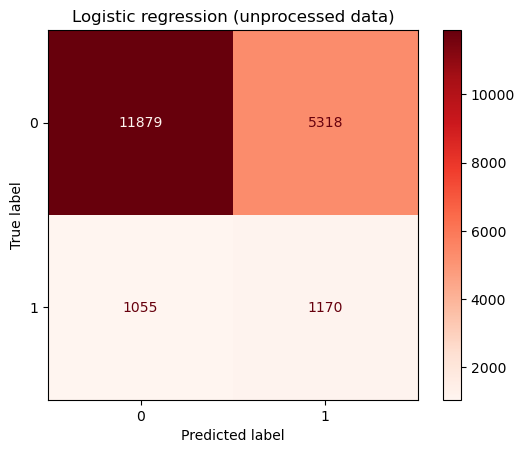

In [11]:
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap="Reds")

plt.title('Logistic regression (unprocessed data)')

plt.savefig('./figs/conf_mat_log_1.png')
plt.show()